               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  
  Column Name                                        Description
0     country                                Name of the country
1  child_mort  Death of children under 5 years of age per 100...
2     exports  Exports of goods and services per capita. Give...
3      health  Total health spending 

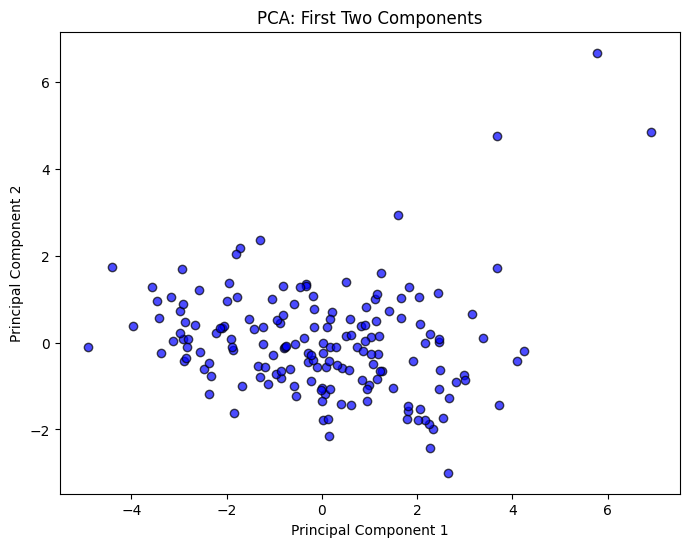

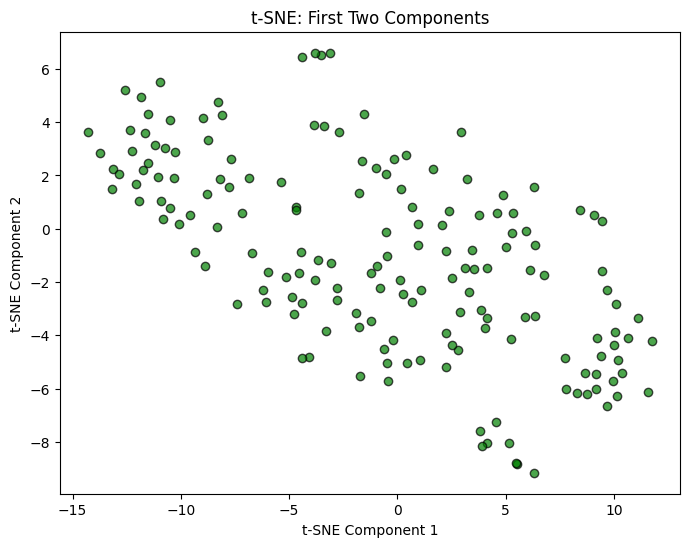


Testing KMeans with StandardScaler:
Clusters: 2 | Silhouette: 0.2663 | Calinski: 68.1914 | Davies-Bouldin: 1.3686
Clusters: 3 | Silhouette: 0.2856 | Calinski: 66.2150 | Davies-Bouldin: 1.2742
Clusters: 4 | Silhouette: 0.2880 | Calinski: 54.3779 | Davies-Bouldin: 0.9983
Clusters: 5 | Silhouette: 0.3009 | Calinski: 57.6225 | Davies-Bouldin: 0.8671
Clusters: 6 | Silhouette: 0.2357 | Calinski: 53.6765 | Davies-Bouldin: 1.0770
Clusters: 7 | Silhouette: 0.2479 | Calinski: 54.0959 | Davies-Bouldin: 1.0088
Clusters: 8 | Silhouette: 0.2020 | Calinski: 46.8446 | Davies-Bouldin: 1.2155
Clusters: 9 | Silhouette: 0.1923 | Calinski: 45.4877 | Davies-Bouldin: 1.1958
Clusters: 10 | Silhouette: 0.1962 | Calinski: 43.0323 | Davies-Bouldin: 1.1683


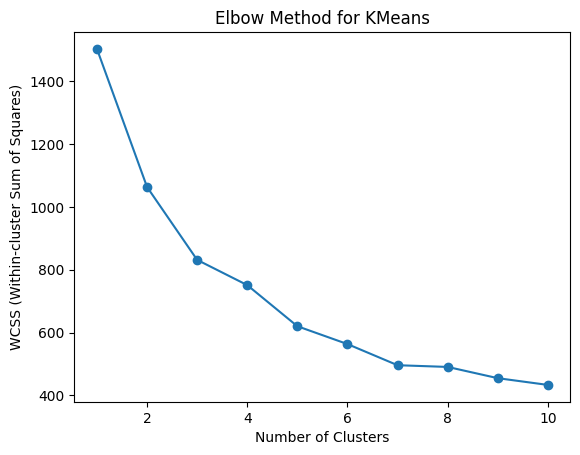


Testing DBSCAN with StandardScaler:
eps: 1.0, min_samples: 5 | Silhouette: -0.0248 | Calinski: 13.0840 | Davies-Bouldin: 1.9090
eps: 1.0, min_samples: 10 | Silhouette: -0.1458 | Calinski: 3.4907 | Davies-Bouldin: 2.3297
eps: 1.5, min_samples: 5 | Silhouette: 0.2883 | Calinski: 8.4918 | Davies-Bouldin: 3.7808
eps: 1.5, min_samples: 10 | Silhouette: 0.2532 | Calinski: 9.5396 | Davies-Bouldin: 3.7056


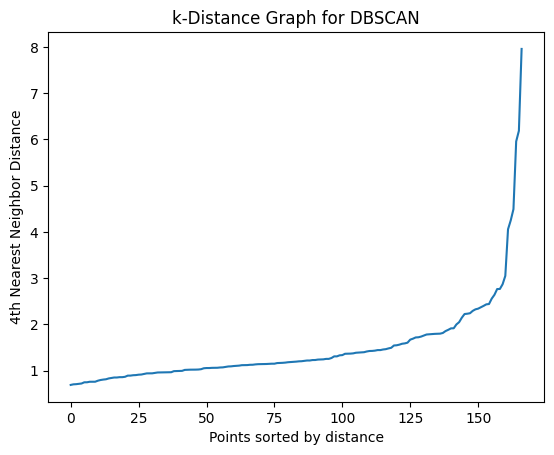


KMeans Cluster Labels:  [2 0 0 2 0 0 0 1 1 0 1 0 0 0 0 1 0 2 0 0 0 0 0 1 0 2 2 0 2 1 0 2 2 0 0 0 2
 2 2 0 2 0 1 1 1 0 0 0 0 2 2 0 0 1 1 2 2 0 1 2 1 0 0 2 2 0 2 0 1 0 0 0 0 1
 1 1 0 1 0 0 2 2 1 0 2 0 0 2 2 0 0 4 0 2 2 0 0 2 4 2 0 0 0 0 0 0 2 0 2 0 1
 1 2 3 1 0 2 0 0 0 0 0 1 1 0 0 2 0 0 2 0 0 2 4 0 1 0 2 1 1 0 0 2 0 1 1 0 2
 0 2 2 0 0 0 0 2 0 1 1 1 0 0 0 0 0 2 2]

DBSCAN Cluster Labels:  [ 0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1
  0  0  0  0  0  0  0 -1  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0  0  0
  0 -1  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0
 -1 -1  0  0  0  0  0  0  0 -1 -1  0  0  0  0 -1 -1  0  0 -1  0  0  0  0
  0  0 -1  0  0 -1  0 -1  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0
  0  0  0 -1  0  0 -1  0  0  0  0 -1 -1 -1  0  0  0 -1  0  0  0  0  0  0
  0  0  0  0  0 -1  0  0  0  0 -1  0  0  0  0 -1  0  0  0 -1  0  0  0]


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.neighbors import NearestNeighbors
import math

# I. Import Data
df = pd.read_csv('../data/raw/Country-data.csv')
print(df.head())
dd = pd.read_csv('../data/data-dictionary.csv')
print(dd.head())
print(f"Dataset shape: {df.shape[0]} rows, {df.shape[1]} columns")
df.info()
df.describe()

# II. Data Processing
# Extract numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
X = df[numerical_columns]

# Check for missing values
X = X.dropna()

# Apply StandardScaler
standard_scaler = StandardScaler()
X_standard_scaled = standard_scaler.fit_transform(X)

# III. Visualize if the data is Linear or Non-Linear

# 1. Apply PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_standard_scaled)

# Plot the first two PCA components
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c='blue', edgecolors='k', alpha=0.7)
plt.title('PCA: First Two Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# 2. Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(X_standard_scaled)

# Plot the t-SNE components
plt.figure(figsize=(8, 6))
plt.scatter(tsne_components[:, 0], tsne_components[:, 1], c='green', edgecolors='k', alpha=0.7)
plt.title('t-SNE: First Two Components')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

# IV. Clustering with KMeans

# Function to evaluate KMeans
def evaluate_kmeans(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X)
    silhouette = silhouette_score(X, labels)
    calinski = calinski_harabasz_score(X, labels)
    davies_bouldin = davies_bouldin_score(X, labels)
    return silhouette, calinski, davies_bouldin

# Test KMeans for different numbers of clusters
for scaler_name, X_scaled in [("StandardScaler", X_standard_scaled)]:
    print(f"\nTesting KMeans with {scaler_name}:")
    for n_clusters in range(2, 11):  # Try clusters from 2 to 10
        silhouette, calinski, davies_bouldin = evaluate_kmeans(X_scaled, n_clusters)
        print(f"Clusters: {n_clusters} | Silhouette: {silhouette:.4f} | Calinski: {calinski:.4f} | Davies-Bouldin: {davies_bouldin:.4f}")

# Hyperparameter tuning using Elbow method (WCSS)
wcss = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_standard_scaled)
    wcss.append(kmeans.inertia_)

# Plot WCSS vs number of clusters
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for KMeans")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Within-cluster Sum of Squares)")
plt.show()

# V. Clustering with DBSCAN

# Function to evaluate DBSCAN
def evaluate_dbscan(X, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X)
    # Exclude noise points (labeled as -1) from evaluation
    if len(set(labels)) > 1:
        silhouette = silhouette_score(X, labels)
        calinski = calinski_harabasz_score(X, labels)
        davies_bouldin = davies_bouldin_score(X, labels)
        return silhouette, calinski, davies_bouldin
    else:
        return None, None, None

# Test DBSCAN for different eps and min_samples values
for scaler_name, X_scaled in [("StandardScaler", X_standard_scaled)]:
    print(f"\nTesting DBSCAN with {scaler_name}:")
    for eps in [0.5, 1.0, 1.5]:  # Try different eps values
        for min_samples in [5, 10]:  # Try different min_samples values
            silhouette, calinski, davies_bouldin = evaluate_dbscan(X_scaled, eps, min_samples)
            if silhouette:
                print(f"eps: {eps}, min_samples: {min_samples} | Silhouette: {silhouette:.4f} | Calinski: {calinski:.4f} | Davies-Bouldin: {davies_bouldin:.4f}")

# VI. Hyperparameter Tuning for DBSCAN using k-Distance Graph
# Fit Nearest Neighbors model
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(X_standard_scaled)
distances, indices = nbrs.kneighbors(X_standard_scaled)

# Sort distances for the k-distance plot
distances = np.sort(distances[:, 4], axis=0)
plt.plot(distances)
plt.title("k-Distance Graph for DBSCAN")
plt.xlabel("Points sorted by distance")
plt.ylabel("4th Nearest Neighbor Distance")
plt.show()

# VII. Model Evaluation and Best Model
# After testing both models (KMeans and DBSCAN), pick the best one based on the evaluation metrics and the hyperparameter tuning

# Final evaluation to decide on the best model based on silhouette, Calinski, and Davies-Bouldin scores
# For KMeans
best_kmeans_clusters = 5  # Replace with the cluster value that gives the best evaluation
kmeans = KMeans(n_clusters=best_kmeans_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X_standard_scaled)

# For DBSCAN
best_dbscan_eps = 1.5  # Replace with the best eps value from evaluation
best_dbscan_min_samples = 5  # Replace with the best min_samples value from evaluation
dbscan = DBSCAN(eps=best_dbscan_eps, min_samples=best_dbscan_min_samples)
dbscan_labels = dbscan.fit_predict(X_standard_scaled)

# Print results
print("\nKMeans Cluster Labels: ", kmeans_labels)
print("\nDBSCAN Cluster Labels: ", dbscan_labels)

# Choose the model with the highest silhouette score or other preferred metric for final recommendation.
